In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import sys
!{sys.executable} -m pip install shap
!{sys.executable} -m pip install lightgbm

You are using pip version 18.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import shap
import lightgbm

In [4]:
aggregates = pd.read_csv("aggregates.csv")
transactions = pd.read_csv("transactions.csv")

In [5]:
aggregates.head(10)

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
0,4268,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8951,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3485,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8008,2019-11-01 00:00:00,2.0,6.0,12.0,24.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1615,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6827,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4451,2019-11-01 00:00:00,2.0,9.0,16.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6539,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6596,2019-11-01 00:00:00,4.0,10.0,18.0,34.0,1.0,4.0,5.0,490000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,825,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [6]:
transactions.head(10)

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
0,4268,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8951,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3485,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8008,2019-11-01 00:00:00,2.0,6.0,12.0,24.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1615,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6827,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4451,2019-11-01 00:00:00,2.0,9.0,16.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6539,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6596,2019-11-01 00:00:00,4.0,10.0,18.0,34.0,1.0,4.0,5.0,490000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,825,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [7]:
print(aggregates.shape, transactions.shape)

(177963, 220) (177963, 220)


**Частота использования конкретного продукта для каждого пользователя**
* df_final_abs - конкретное кол-во использования
* df_final_rel - относительная частота

In [8]:
groups = transactions.value_counts(["client_id", "mcc_group"])
df_final_abs = groups.unstack().fillna(0).astype(int)
df_final_rel = df_final_abs.div(transactions.groupby(['client_id']).size(), axis = 0)

KeyError: 'mcc_group'

In [ ]:
transactions

In [9]:
np.unique(list(aggregates['client_id'])).shape

(9895,)

**Сколько есть информации на каждого пользователя**

In [10]:
def funcNan(df):
    res = np.count_nonzero(df.count().values)
    return res
    
res = aggregates.groupby(['client_id']).apply(funcNan)

In [11]:
aggregates.head()

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
0,4268,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8951,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3485,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8008,2019-11-01 00:00:00,2.0,6.0,12.0,24.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1615,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


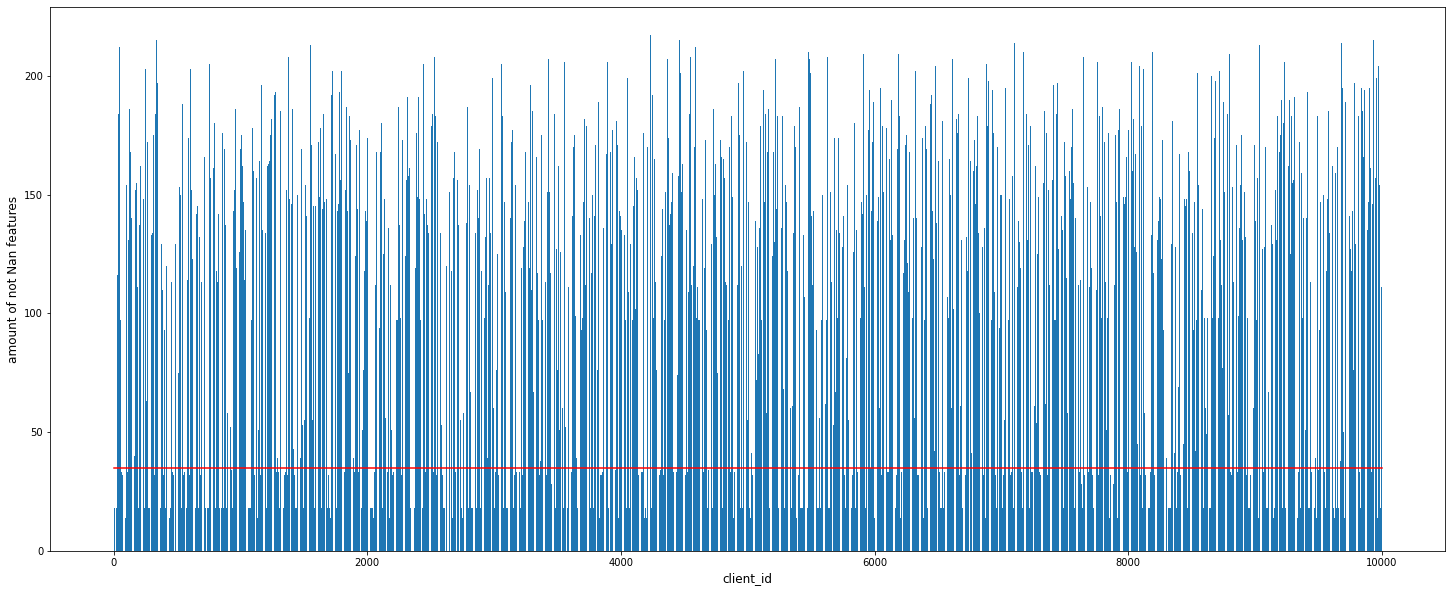

In [12]:
fig, ax = plt.subplots(1, 1,figsize=(25, 10))
ax.plot([0, 10000], [35, 35], color='red')
ax.bar(res.index, res.values)
ax.set_xlabel('client_id', fontsize=12)
ax.set_ylabel('amount of not Nan features', fontsize=12)
plt.show()

Делаем вывод, что есть клиенты, о которых информации очень мало. Т.е. из 220 признаков заполнены N (см красную линию)

**Посчитаем квантили:** 
* Построй график, по оси икс - квантили (0.05, 0.25,0.5,0.75, 0.95)

In [13]:
np.quantile(res.values, [0.05, 0.25,0.5,0.75, 0.95])

array([ 18.,  33., 124., 161., 198.])

**Найдем максимальный промежуток времени, для которого мы владеем информацией**

In [14]:
aggregates[aggregates['client_id'] == 0]['report_date']

6085      2020-04-01 00:00:00
49228     2020-03-01 00:00:00
59839     2020-09-01 00:00:00
60502     2019-09-01 00:00:00
76834     2020-07-01 00:00:00
83932     2019-12-01 00:00:00
92594     2020-06-01 00:00:00
95011     2019-08-01 00:00:00
102743    2019-11-01 00:00:00
140742    2020-01-01 00:00:00
145080             2020-10-01
145559    2020-02-01 00:00:00
153434    2019-10-01 00:00:00
153862    2020-08-01 00:00:00
170930    2020-05-01 00:00:00
Name: report_date, dtype: object

Из таблицы видно, что информация дискретна по месяцам

Найдем на какое максимальное количество месяцев у нас есть информация

In [15]:
dinamika_date = aggregates.groupby(['client_id']).apply(lambda x: x.shape[0])

In [16]:
dinamika_date.unique()

array([15, 22,  9, 13,  5, 10,  7, 19, 12,  6, 14, 17,  8,  2, 11,  3, 21,
       18,  4, 20, 16,  1])

**Найдем признаки, по которым меньше всего инфы**

In [17]:
resFeature = aggregates.apply(lambda x: x.count(), axis =0)

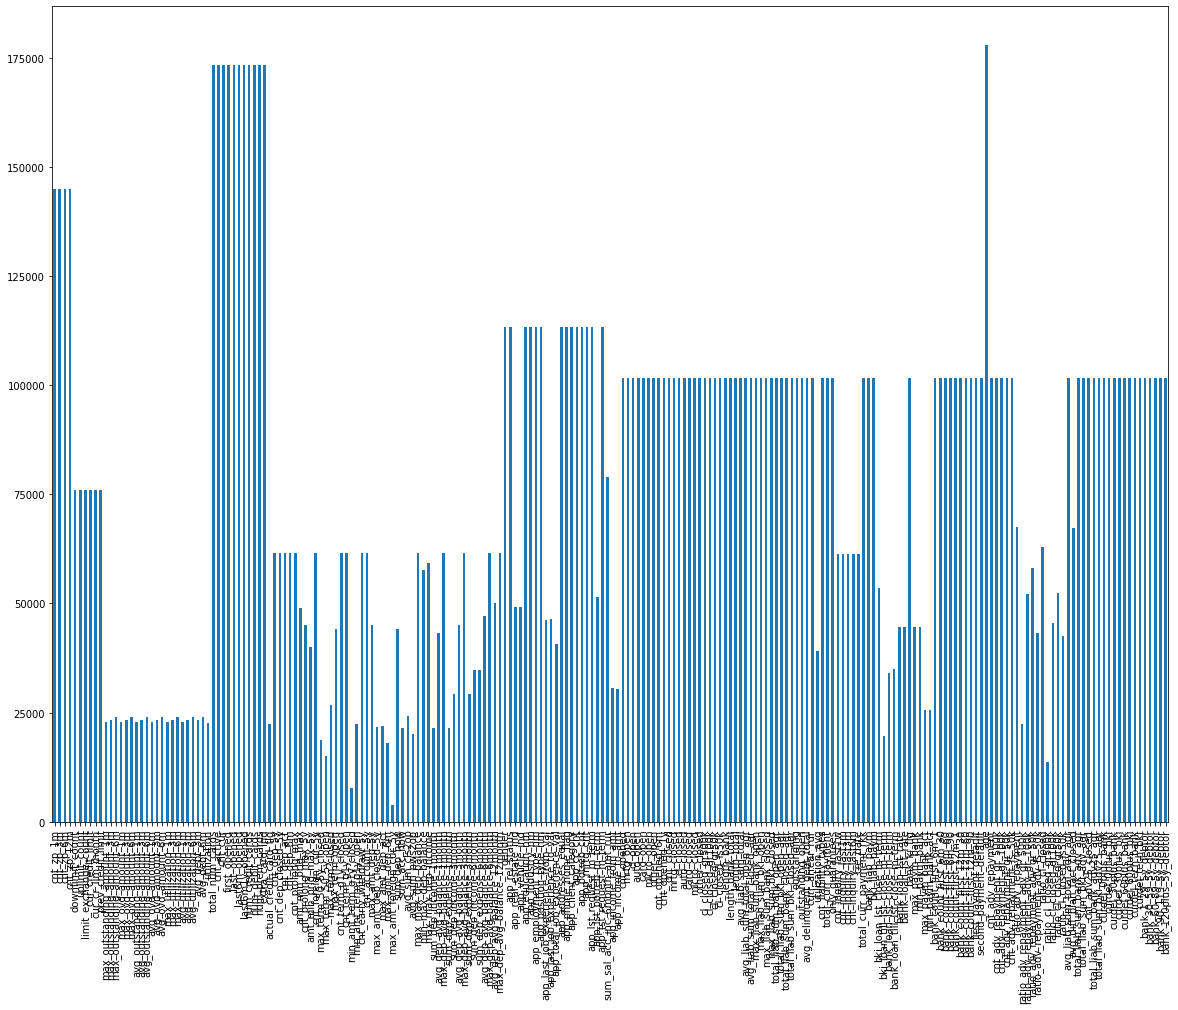

In [18]:
plot = resFeature[2:].plot
ax = plot.bar(figsize=(20,15))

**Нужно посмотреть насколько равномерно признаки покрывают каждого клиента**

**Заполняем наны**

****Формируем таргет****


Так как необходимо выявить склонность клиента к продукту "потребительский кредит", то в качестве таргеты выберем признак *cl_open* - ***количество открытых потребительских кредитов***. Будем считать, что был открыт новый кредит, если cl_open увеличилось. Таргет будет бинарный, то есть кредит либо взят, либо нет. 

In [19]:
def append_target(df):
    serial = df['cl_open']
    shift = serial.shift()
    df['target'] = np.heaviside((serial - shift).fillna(0), 0)
    return df
    
aggregates = aggregates.groupby('client_id').apply(append_target)

**Найдем все категориальные признаки и приведем их к вещественному виду или удалим в виду ненадобности**

In [20]:
aggregates.select_dtypes(['object']).columns.to_list()

['report_date',
 'app_rel_status',
 'app_education_nm',
 'app_industry_nm',
 'app_employment_type_nm',
 'app_position_type_nm',
 'app_client_category',
 'cre_date']

**Преобразование признака сфера деятельности**

In [21]:
aggregates.drop(['app_industry_nm'], inplace=True, axis=1)

**Преобразование признака категория клиента**

In [22]:
aggregates.drop(['app_client_category'], inplace=True, axis=1)

**Преобразование признака тип занимаемой должности**

In [23]:
aggregates.drop(['app_employment_type_nm'], inplace=True, axis=1)

**Преобразование признака дата запроса из cre, по которому производился расчет агрегатов**

In [24]:
aggregates.drop(['cre_date'], inplace=True, axis=1)

**Преобразование признака должность**

In [25]:
aggregates.drop(['app_position_type_nm'], inplace=True, axis=1)

**Преобразование признака образования**

Захешируем данные признака в виде чисел

In [26]:
feature = 'app_education_nm'
dict_replace = {' ': 0,
 0: 0,
 'Неполное высшее': 1,
 'Высшее': 2,
 'Средне-специальное': 1,
 'Среднее специальное': 1,
 'Среднее': 1,
 'среднее-специальное': 1,
 'Незаконченное высшее': 1,
 'Два и более высших': 2,
 'высшее': 2,
 'Ученая степень': 2}
aggregates[feature] = aggregates[feature].map(dict_replace)
aggregates[feature] = aggregates[feature].fillna(0)

**Преобразование даты**

Отсортируем данные в по времени

In [27]:
aggregates = aggregates.sort_values(by=['report_date'])

In [28]:
from datetime import datetime, date

aggregates['report_date'] = aggregates['report_date'].apply(lambda x: x.split(' ')[0])
aggregates['report_date'] = aggregates['report_date'].apply(lambda x: datetime.strptime(x ,'%Y-%m-%d'))
#Переводим в timestamp
aggregates['ts'] = aggregates['report_date'].astype(np.int64) // 10 ** 9
#Нормируем
aggregates['ts'] = aggregates['ts']/np.mean(aggregates['ts'])

**Преобразование семейного положения**

Захешируем данные признака в виде чисел

In [29]:
dict_rel_status = ({'Женат/Замужем':0, 'Холост / Не замужем':1,'Состоит в зарегистрированном браке':0,
                'Разведен/Разведена':1, 'Никогда не состоял(а) в браке':1, 'женат / замужем':0, 
                'Разведен(а) официально (развод зарегистрирован)':1, 'холост / не замужем':1, 
                'Вдовец/Вдова':1, 'в разводе':1, 'Гражданский брак':0, 'Вдовец (вдова)':1, 'Холост':1,
                'Холост/Не замужем':1, 'Женат / Замужем (брачный контракт) ':0, 'Одинокий':1, 'В разводе':1, 
                'Незамужем':1, 'вдова/вдовец':1, 'Женат':0, 'Состоит в незарегистрированном браке':0, 
                'Замужем': 0,'гражданский брак':0, 'женат / замужем (брачный контракт)':0,' ':1})

aggregates['app_rel_status'] = aggregates['app_rel_status'].map(dict_rel_status)
aggregates['app_rel_status'] = aggregates['app_rel_status'].fillna(0)

**Преобразование client_id**

In [30]:
aggregates['client_id'].unique().size

9895

Из-за того, что уникальных клиентов слишком много (9895), нельзя использовать one-hot encoding, так как тогда матрица станет очень разряженной, что плохо повлияет на модель обучения. Воспользуемся его модификацией, которая сочетает в себе еще и хеширование признака

In [31]:
max_client_id = aggregates['client_id'].unique().max()

In [32]:
client_id_cols = ['client_id_col_' + str(i) for i in range(14)]
list_binary= ['{0:14b}'.format(i) for i in list(aggregates['client_id'])]
aggregates['bin'] = [i.replace(' ', '0') for i in list_binary]
aggregates[client_id_cols] = aggregates['bin'].apply(list).tolist()
aggregates[client_id_cols] =aggregates[client_id_cols].astype(int)
aggregates.pop('bin')

86454     00101000110001
71685     00001011011101
71686     10000110001000
71687     00001011111111
71688     01011100001100
               ...      
111570    01110111100101
111569    00111010010001
111568    01001000010010
111574    01110110101011
88981     10000101001011
Name: bin, Length: 177963, dtype: object

Ниже видно, что мы привели все категориальные признаки к вещественному формату

In [33]:
aggregates.select_dtypes(['object']).shape

(177963, 0)

**Преобразуем бинарные признаки**

Нормировка возраста

In [34]:
aggregates['age'] = np.round(aggregates['age'])
aggregates['age'] = aggregates['age']/np.mean(aggregates['age'])

In [35]:
# aggregates = pd.concat([transactions, aggregates])
aggregates = aggregates.fillna(0)

In [ ]:
# aggregates.pop('last_day_month')

**Отформатировав признаки, можем переходить к обучению модели**

In [36]:
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import json

In [37]:
#
# Prepare the data
#

def train_df(df):
    index = df.index
    size = index.size
    return df.loc[index[:int(0.2*size)]]

def test_df(df):
    index = df.index
    size = index.size
    return df.loc[index[int(0.2*size):size]]

test = aggregates.groupby('client_id').apply(test_df)
train = aggregates.groupby('client_id').apply(train_df)

In [38]:
#
# Create training and validation sets
#
y_train = train.target.values
y_test = test.target.values
test.drop(['target', 'report_date', 'cl_open', 'client_id'], inplace=True, axis=1)
train.drop(['target', 'report_date', 'cl_open', 'client_id'], inplace=True, axis=1)
x_train = train.values
x_test = test.values

#
# Create the LightGBM data containers
#
train_data = lightgbm.Dataset(x_train, label=y_train)

test_data = lightgbm.Dataset(x_test, label=y_test)

#
# Train the model
#

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[1]	valid_0's auc: 0.887791
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884728
[3]	valid_0's auc: 0.918894
[4]	valid_0's auc: 0.924407
[5]	valid_0's auc: 0.927163
[6]	valid_0's auc: 0.926771
[7]	valid_0's auc: 0.928123
[8]	valid_0's auc: 0.929545
[9]	valid_0's auc: 0.93031
[10]	valid_0's auc: 0.931303
[11]	valid_0's auc: 0.931861
[12]	valid_0's auc: 0.932038
[13]	valid_0's auc: 0.931337


TypeError: the JSON object must be str, bytes or bytearray, not 'dict'

In [39]:
# model_dict = json.loads(model.dump_model())
feature_importances = model.dump_model()['feature_importances']
#
# Create a submission
#


y_res_train = model.predict(x_train)
y_res_test = model.predict(x_test)

res_test = pd.DataFrame({'res_test':y_res_test, 'y_test':y_test})
res_train = pd.DataFrame({'res_train':y_res_train,'y_train':y_train})

res_test.to_csv('test.csv')
res_train.to_csv('train.csv')

In [41]:
columns = train.columns.to_list()
feature_importances ={k: v for k, v in sorted(model.dump_model()['feature_importances'].items(), key=lambda item: item[1])}
x_feature = list(map(lambda x: columns[int(x.split('_')[-1])], feature_importances.keys()))
y_feature = feature_importances.values()

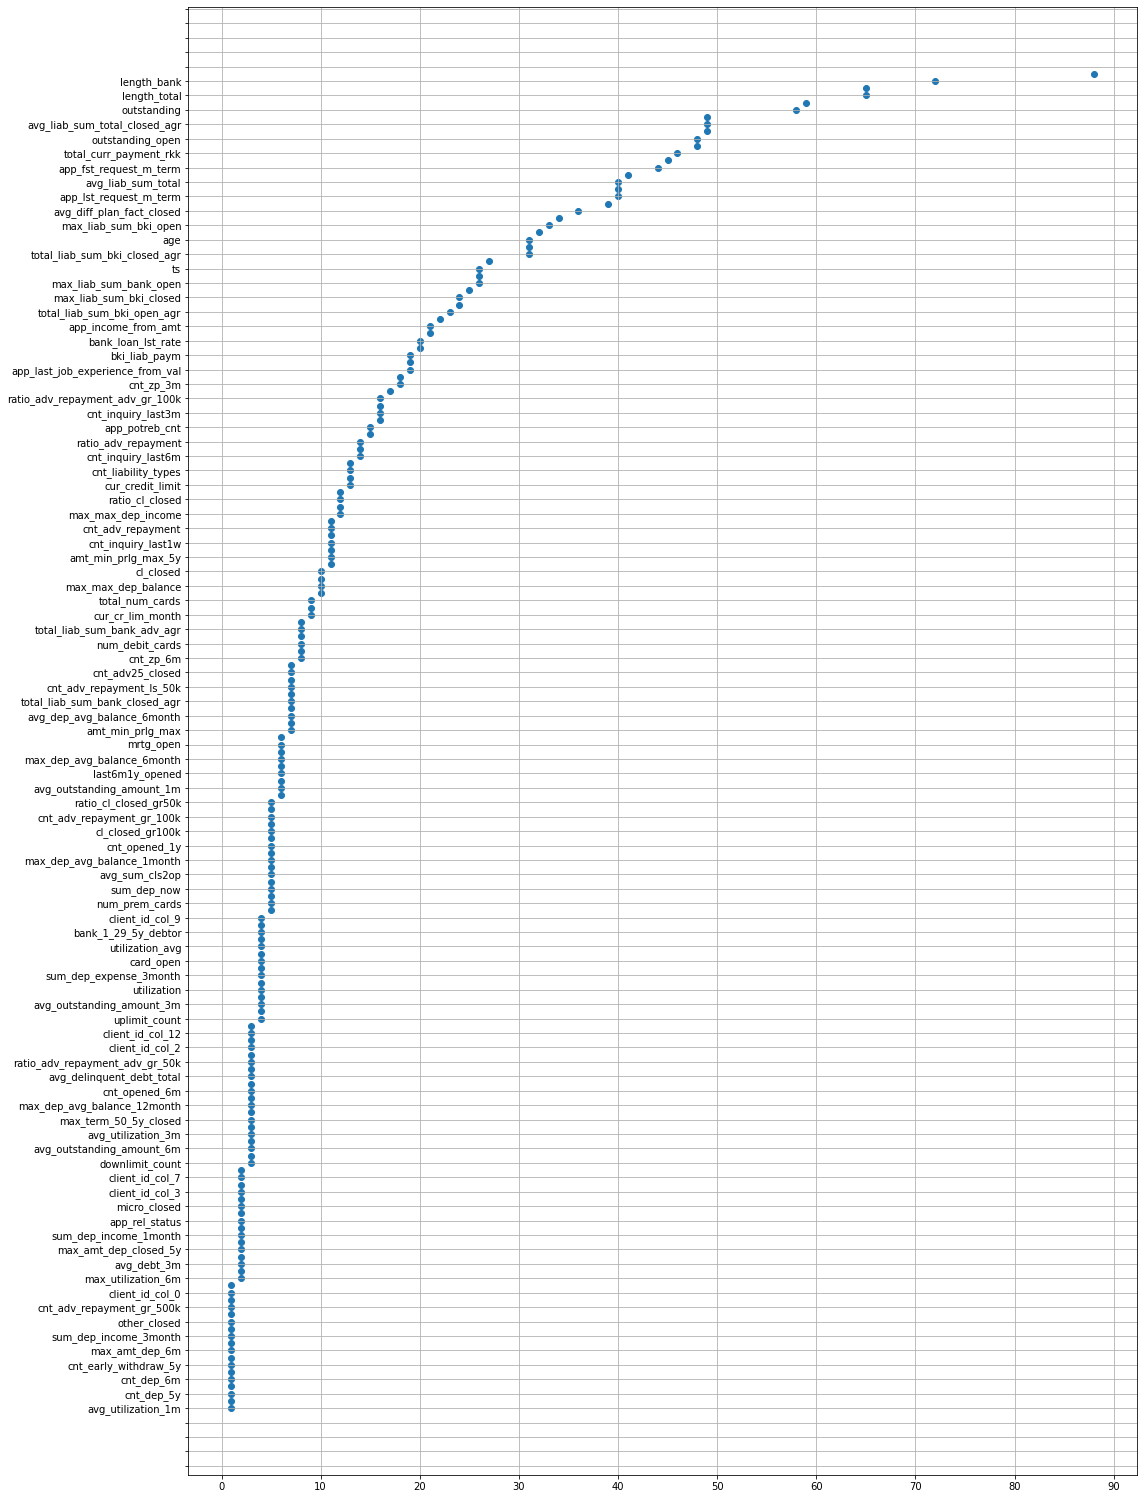

In [42]:
fig, ax = plt.subplots(1, 1,figsize=(17, 27))
ax.scatter(y_feature, x_feature)
# ax.set_xlabel('client_id', fontsize=12)
# ax.set_ylabel('amount of not Nan features', fontsize=12)
#  Подключаем модуль управления тиками:
import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
#  Устанавливаем интервал вспомогательных делений:

#  Тоже самое проделываем с делениями на оси "y":
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

ax.grid()
plt.show()

In [43]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [44]:
from sklearn.metrics import f1_score

y_true_train = df_train['y_train']
y_res_train = df_train['res_train']

y_true_test = df_test['y_test']
y_res_test = df_test['res_test']

def ff(ll):
    ll_1 = ll>=0.5
    ll_1 = ll_1.astype(int)
    return ll_1
    
    
y_true_train1 = ff(y_true_train) 
y_res_train1= ff(y_res_train) 
y_true_test1= ff(y_true_test) 
y_res_test1= ff(y_res_test) 

print('f1 for train = ', f1_score(y_true_train1, y_res_train1, average='weighted'))
print('f1 for test = ', f1_score(y_true_test1, y_res_test1, average='weighted'))

f1 for train =  0.9531126374728617
f1 for test =  0.9176623846498148
